In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import model_selection,linear_model,svm,datasets

In [2]:
def load_data_regression():
    diabetes=datasets.load_diabetes()
    return model_selection.train_test_split(diabetes.data,diabetes.target,test_size=0.25,random_state=0)

X_train,X_test,y_train,y_test=load_data_regression()

In [3]:
def load_iris_data():
    data_iris=datasets.load_iris()
    return model_selection.train_test_split(data_iris.data,data_iris.target,test_size=0.25,random_state=0)

Xiris_train,Xiris_test,yiris_train,yiris_test=load_iris_data()

#### iris是分类问题

In [4]:
def test_LinearSVC(*data):
    X_train,X_test,y_train,y_test=data
    cls=svm.LinearSVC()
    cls.fit(X_train,y_train)
    print("Coeff:%s, intercept:%s" %(cls.coef_,cls.intercept_))
    print("Score:%.2f" % cls.score(X_test,y_test))
    
test_LinearSVC(Xiris_train,Xiris_test,yiris_train,yiris_test)

Coeff:[[ 0.21778659  0.3984205  -0.83300941 -0.4199227 ]
 [ 0.02221578 -0.79595904  0.39248758 -0.90839995]
 [-1.08579213 -0.78198897  1.61130508  1.5015217 ]], intercept:[ 0.10834487  1.50675332 -1.25380975]
Score:0.92


In [5]:
def test_LinearSVC_loss(*data):
    X_train,X_test,y_train,y_test=data
    losses=['hinge','squared_hinge']
    for loss in losses:
        cls=svm.LinearSVC(loss=loss)
        cls.fit(X_train,y_train)
        print("Loss:%s" %loss)
        print("Coeff:%s, intercept:%s" %(cls.coef_,cls.intercept_))
        print("Score:%.2f" % cls.score(X_test,y_test))
test_LinearSVC_loss(Xiris_train,Xiris_test,yiris_train,yiris_test)  

Loss:hinge
Coeff:[[ 0.36658376  0.32434602 -1.07947937 -0.56206184]
 [ 0.27012444 -0.97050628  0.17948576 -0.71864621]
 [-1.28030942 -1.04872013  1.90758127  1.97736078]], intercept:[ 0.17631894  0.67965284 -1.50038798]
Score:0.84
Loss:squared_hinge
Coeff:[[ 0.21778405  0.39842231 -0.83300972 -0.41992807]
 [ 0.02762595 -0.80665396  0.392009   -0.90827161]
 [-1.0858422  -0.78179833  1.61124356  1.50144173]], intercept:[ 0.10834669  1.50875774 -1.25408698]
Score:0.92


In [6]:
def test_LinearSVC_reg(*data):
    X_train,X_test,y_train,y_test=data
    regs=['l1','l2']
    for reg in regs:
        cls=svm.LinearSVC(penalty=reg,dual=False)
        cls.fit(X_train,y_train)
        print("Penalty:%s" %reg)
        print("Coeff:%s, intercept:%s" %(cls.coef_,cls.intercept_))
        print("Score:%.2f" % cls.score(X_test,y_test))
test_LinearSVC_reg(Xiris_train,Xiris_test,yiris_train,yiris_test)  

Penalty:l1
Coeff:[[ 0.16455433  0.51968305 -0.93252002  0.        ]
 [ 0.09101605 -0.99381182 -0.03095747  0.        ]
 [-0.84636348 -0.76901286  1.43152779  1.66589278]], intercept:[ 0.          2.19682772 -2.20111712]
Score:0.92
Penalty:l2
Coeff:[[ 0.21913494  0.39632008 -0.83567138 -0.41726075]
 [ 0.02771728 -0.8078901   0.39130354 -0.90768387]
 [-1.0859648  -0.78192929  1.61142085  1.50151589]], intercept:[ 0.11179235  1.51084483 -1.25404219]
Score:0.92


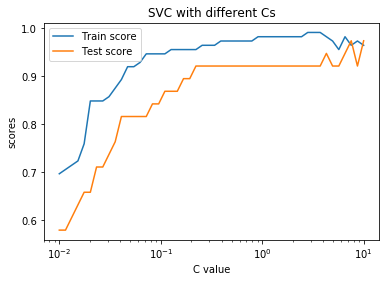

In [7]:
def test_LinearSVC_C(*data):
    X_train,X_test,y_train,y_test=data
    Cs=np.logspace(-2,1)
    train_scores=[]
    test_scores=[]
    for c in Cs:
        cls=svm.LinearSVC(C=c)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test,y_test))
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(Cs,train_scores,label="Train score")
    ax.plot(Cs,test_scores,label="Test score")
    ax.set_xscale('log')
    ax.set_xlabel("C value")
    ax.set_ylabel(r"scores")
    ax.set_title("SVC with different Cs")
    ax.legend(loc="best")
    plt.show()
    
test_LinearSVC_C(Xiris_train,Xiris_test,yiris_train,yiris_test)  

> 惩罚项太小的时候,训练出的结果不是很好

#### 非线性SVM

1. 参数

`C`: 惩罚项系数

`kernel`:指定核函数
    1. `linear` 线性核函数
    2. `poly` 多项式核函数
    3. `rbf` 高斯核函数
    4. `sigmoid` 
    5. `precomputed` 

In [9]:
def test_SVC_linear(*data):
    X_train,X_test,y_train,y_test=data
    cls=svm.SVC(kernel='linear')
    cls.fit(X_train,y_train)
    print("Coeff:%s, intercept:%s" %(cls.coef_,cls.intercept_))
    print("Score:%.2f" % cls.score(X_test,y_test))
    

test_SVC_linear(Xiris_train,Xiris_test,yiris_train,yiris_test)  

Coeff:[[-0.04627259  0.52114901 -1.00303714 -0.46412669]
 [ 0.04016065  0.16064259 -0.56224908 -0.24096389]
 [ 0.84531147  0.72837956 -2.09462768 -1.83669367]], intercept:[ 1.45298766  1.34136571  5.81626016]
Score:0.97


考察多项式的核函数:
$$K(x,z)=(\gamma (x*z+1)+r)^p$$
`p`由degree决定.

In [32]:
def show_img(r,c,imgid,x,y1,y2,y1_name,y2_name,title_name,x_name,y_name,y_lim,legend_name,x_scale_log=False,y_lim_min=0):
    fig=plt.figure()
    ax=fig.add_subplot(r,c,imgid)
    ax.plot(x,y1,label=y1_name)
    ax.plot(x,y2,label=y2_name)
    #ax.set_xscale(x_name)
    ax.set_xlabel(x_name)
    ax.set_ylabel(y_name)
    ax.set_title(title_name)
    ax.set_ylim(y_lim_min,y_lim)
    if x_scale_log==True:
        ax.set_xscale('log')
    ax.legend(loc=legend_name)
    plt.show()


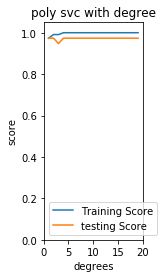

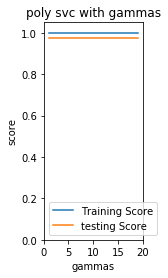

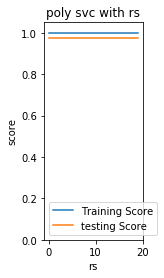

In [26]:
def test_SVC_poly(*data):
    X_train,X_test,y_train,y_test=data
    # poly有三个参数约束, gamma, r, p(degree)
    # degree
    degrees= range(1,20)
    train_scores=[]
    test_scores=[]
    for degree in degrees:
        cls=svm.SVC(kernel='poly',degree=degree)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test,y_test))
    
    show_img(r=1,c=3,imgid=1,x=degrees,y1=train_scores,y2=test_scores,y1_name="Training Score",y2_name="testing Score",title_name="poly svc with degree",x_name="degrees",y_name="score",y_lim=1.05,legend_name="best")
    
    # gamma
    gammas=range(1,20)
    train_scores=[]
    test_scores=[]
    for gamma in gammas:
        cls=svm.SVC(kernel='poly',degree=3,gamma=gamma)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test,y_test))
    
    show_img(r=1,c=3,imgid=2,x=gammas,y1=train_scores,y2=test_scores,y1_name="Training Score",y2_name="testing Score",title_name="poly svc with gammas",x_name="gammas",y_name="score",y_lim=1.05,legend_name="best")

    # r
    rs=range(0,20)
    train_scores=[]
    test_scores=[]
    for r in rs:
        cls=svm.SVC(kernel='poly',degree=3,gamma=10,coef0=r)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test,y_test))
    
    show_img(r=1,c=3,imgid=3,x=rs,y1=train_scores,y2=test_scores,y1_name="Training Score",y2_name="testing Score",title_name="poly svc with rs",x_name="rs",y_name="score",y_lim=1.05,legend_name="best")


test_SVC_poly(Xiris_train,Xiris_test,yiris_train,yiris_test)  

考察rbf的高斯核
$$K(x,z)=exp(-\gamma ||x-z||^2)$$

它的参数: `gamma`


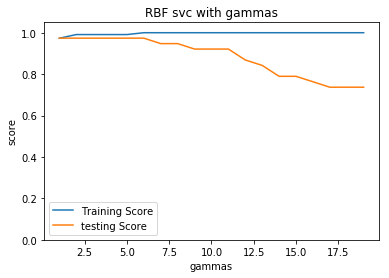

In [27]:
def test_SVC_rbf(*data):
    X_train,X_test,y_train,y_test=data
    # gamma
    gammas=range(1,20)
    train_scores=[]
    test_scores=[]
    for gamma in gammas:
        cls=svm.SVC(kernel='rbf',gamma=gamma)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test,y_test))
    
    show_img(r=1,c=1,imgid=1,x=gammas,y1=train_scores,y2=test_scores,y1_name="Training Score",y2_name="testing Score",title_name="RBF svc with gammas",x_name="gammas",y_name="score",y_lim=1.05,legend_name="best")
    
test_SVC_rbf(Xiris_train,Xiris_test,yiris_train,yiris_test)  

考察sigmoid核函数

$$K(x,z)=tanh(\gamma(x*z)+r)$$

参数:
1. `gamma`
2. `r`


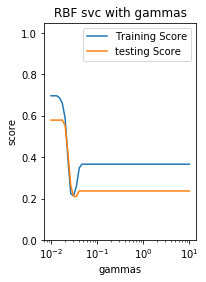

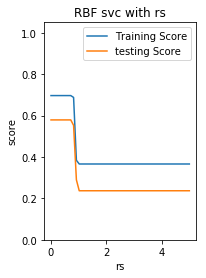

In [30]:
def test_SVC_with_Sigmoid(*data):
    X_train,X_test,y_train,y_test=data
    # gamma
    gammas=np.logspace(-2,1)
    train_scores=[]
    test_scores=[]
    for gamma in gammas:
        cls=svm.SVC(kernel='sigmoid',gamma=gamma,coef0=0)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test,y_test))
    
    show_img(r=1,c=2,imgid=1,x=gammas,y1=train_scores,y2=test_scores,y1_name="Training Score",y2_name="testing Score",title_name="RBF svc with gammas",x_name="gammas",y_name="score",y_lim=1.05,legend_name="best",x_scale_log=True)

    # r
    rs=np.linspace(0,5)
    train_scores=[]
    test_scores=[]
    for r in rs:
        cls=svm.SVC(kernel='sigmoid',gamma=0.01,coef0=r)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test,y_test))
    
    show_img(r=1,c=2,imgid=2,x=rs,y1=train_scores,y2=test_scores,y1_name="Training Score",y2_name="testing Score",title_name="RBF svc with rs",x_name="rs",y_name="score",y_lim=1.05,legend_name="best")
    
test_SVC_with_Sigmoid(Xiris_train,Xiris_test,yiris_train,yiris_test)    

`sigmoid`的核函数表现很糟,无论是固定gamma或r中的任何一个,改变另一个. 随着它的增大,预测精度都会下降.

### 非线性回归SVR

参数

1. `C`惩罚系数
2. `epsilon`
3. `kernel`核函数
    1. `linear`
    2. `poly`
    3. `rbf`
    4. `sigmoid`
    

In [31]:
def test_SVR_linear(*data):
    X_train,X_test,y_train,y_test=data
    cls=svm.SVR(kernel='linear')
    cls.fit(X_train,y_train)
    print("Coeff:%s, intercept:%s" %(cls.coef_,cls.intercept_))
    print("Score:%.2f" % cls.score(X_test,y_test))
    
test_SVR_linear(X_train,X_test,y_train,y_test) 

Coeff:[[ 2.24127622 -0.38128702  7.87018376  5.21135861  2.26619436  1.70869458
  -5.7746489   5.51487251  7.94860817  4.59359657]], intercept:[ 137.11012796]
Score:-0.03


线性回归核函数的效果比线性回归支持向量机要好

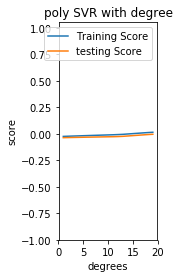

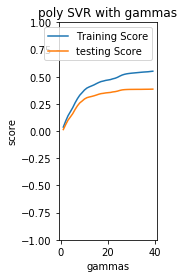

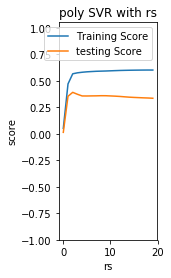

In [38]:
def test_SVR_poly(*data):
    X_train,X_test,y_train,y_test=data
    # poly有三个参数约束, gamma, r, p(degree)
    # degree
    degrees= range(1,20)
    train_scores=[]
    test_scores=[]
    for degree in degrees:
        cls=svm.SVR(kernel='poly',degree=degree,coef0=1)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test,y_test))
    
    show_img(r=1,c=3,imgid=1,x=degrees,y1=train_scores,y2=test_scores,y1_name="Training Score",y2_name="testing Score",title_name="poly SVR with degree",x_name="degrees",y_name="score",y_lim=1.05,legend_name="best",y_lim_min=-1)
    
    # gamma
    gammas=range(1,40)
    train_scores=[]
    test_scores=[]
    for gamma in gammas:
        cls=svm.SVR(kernel='poly',degree=3,gamma=gamma,coef0=1)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test,y_test))
    
    show_img(r=1,c=3,imgid=2,x=gammas,y1=train_scores,y2=test_scores,y1_name="Training Score",y2_name="testing Score",title_name="poly SVR with gammas",x_name="gammas",y_name="score",y_lim=1,legend_name="best",y_lim_min=-1)

    # r
    rs=range(0,20)
    train_scores=[]
    test_scores=[]
    for r in rs:
        cls=svm.SVR(kernel='poly',degree=3,gamma=20,coef0=r)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test,y_test))
    
    show_img(r=1,c=3,imgid=3,x=rs,y1=train_scores,y2=test_scores,y1_name="Training Score",y2_name="testing Score",title_name="poly SVR with rs",x_name="rs",y_name="score",y_lim=1.05,legend_name="best",y_lim_min=-1)


test_SVR_poly(X_train,X_test,y_train,y_test) 

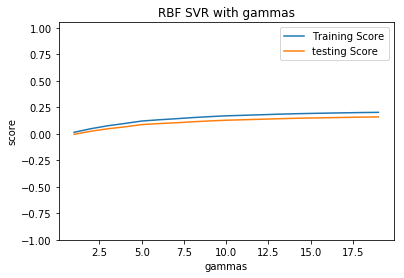

In [40]:
def test_SVR_rbf(*data):
    X_train,X_test,y_train,y_test=data
    # gamma
    gammas=range(1,20)
    train_scores=[]
    test_scores=[]
    for gamma in gammas:
        cls=svm.SVR(kernel='rbf',gamma=gamma)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test,y_test))
    
    show_img(r=1,c=1,imgid=1,x=gammas,y1=train_scores,y2=test_scores,y1_name="Training Score",y2_name="testing Score",title_name="RBF SVR with gammas",x_name="gammas",y_name="score",y_lim=1.05,legend_name="best",y_lim_min=-1)
    
test_SVR_rbf(X_train,X_test,y_train,y_test) 

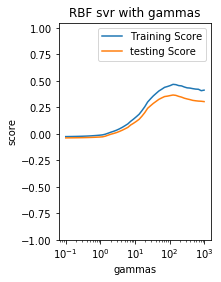

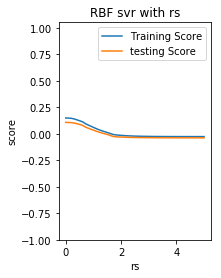

In [43]:
def test_SVR_with_Sigmoid(*data):
    X_train,X_test,y_train,y_test=data
    # gamma
    gammas=np.logspace(-1,3)
    train_scores=[]
    test_scores=[]
    for gamma in gammas:
        cls=svm.SVR(kernel='sigmoid',gamma=gamma,coef0=0.01)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test,y_test))
    
    show_img(r=1,c=2,imgid=1,x=gammas,y1=train_scores,y2=test_scores,y1_name="Training Score",y2_name="testing Score",title_name="RBF svr with gammas",x_name="gammas",y_name="score",y_lim=1.05,legend_name="best",x_scale_log=True,y_lim_min=-1)

    # r
    rs=np.linspace(0,5)
    train_scores=[]
    test_scores=[]
    for r in rs:
        cls=svm.SVR(kernel='sigmoid',gamma=10,coef0=r)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test,y_test))
    
    show_img(r=1,c=2,imgid=2,x=rs,y1=train_scores,y2=test_scores,y1_name="Training Score",y2_name="testing Score",title_name="RBF svr with rs",x_name="rs",y_name="score",y_lim=1.05,legend_name="best",y_lim_min=-1)
    
test_SVR_with_Sigmoid(X_train,X_test,y_train,y_test) 

> 固定r,变化gamma,test的精度先增高后降低.  
固定gamma,精度岁r增大而降低